<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/CNN_For_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use CNN to do Hanwritten digits Classification using MNIST dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras import models, layers, datasets

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train.shape

(60000, 28, 28, 1)

# Model Training

In [11]:
model = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, input_shape = (28, 28, 1), kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,538 (634.91 KB)

 Trainable params: 162,538 (634.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8609 - loss: 0.4389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9794 - loss: 0.0645
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9853 - loss: 0.0453
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9893 - loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9918 - loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9932 - loss: 0.0217
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9950 - loss: 0.0146
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9960 - loss: 0.0122
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9961 - loss: 0.0111


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss {test_loss: .2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0731
Test loss  0.05


In [16]:
print(f'Test accuracy {test_accuracy: .2f}')

Test accuracy  0.99


In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print(f'Classification report: \n {classification_report(y_test, y_pred_class)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Visualizing Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


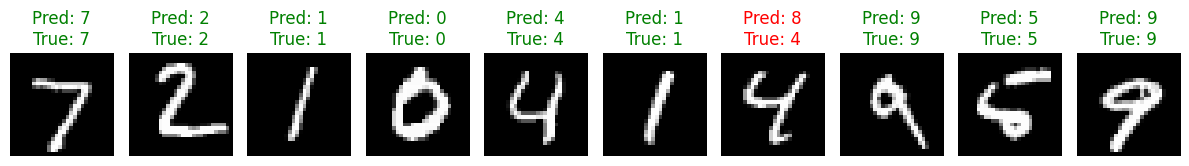

In [18]:
# Get first 5 predictions
preds = model.predict(x_test[:])

# Create a grid of 5 subplots (1 row, 5 columns)
plt.figure(figsize=(12, 3))

for i in range(10):
    # Get predicted class
    predicted_label = tf.argmax(preds[i]).numpy()
    true_label = y_test[i]

    # Plot the image
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}",
              color='green' if predicted_label == true_label else 'red')
    plt.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
